## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [ ]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

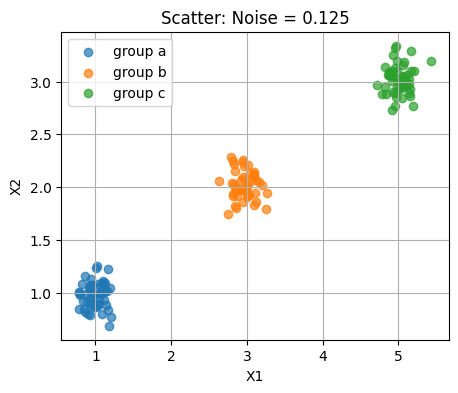

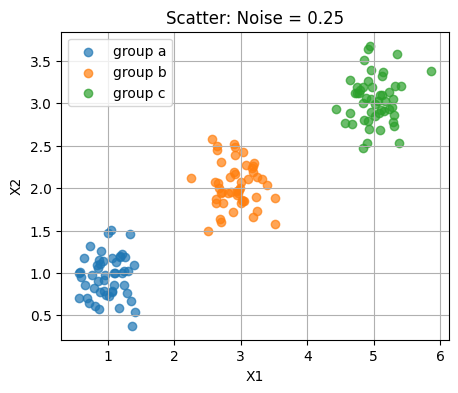

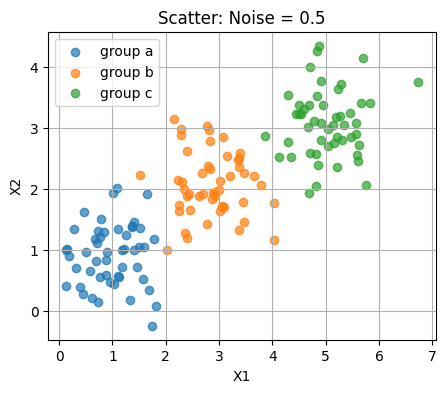

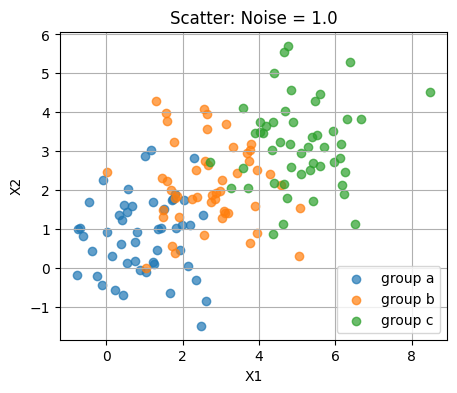

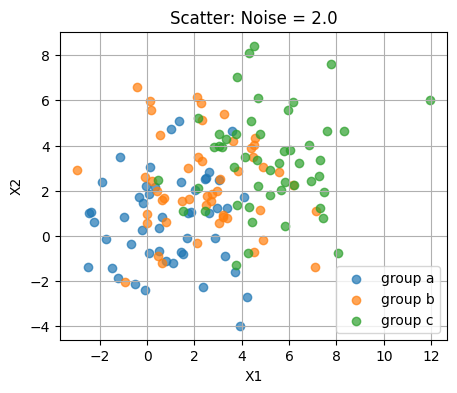

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_noise(df, title):
  plt.figure(figsize=(5,4))
  for g in sorted(df['group'].unique()):
    sub = df[df['group'] == g]
    plt.scatter(sub['x1'], sub['x2'], label=f'group {g}', alpha=0.7)
    plt.xlabel('X1')
    plt.ylabel('X2')
  plt.title(title)
  plt.legend()
  plt.grid(True)
  plt.show()

# Plot each dataset
plot_noise(df0_125, 'Scatter: Noise = 0.125')
plot_noise(df0_25, 'Scatter: Noise = 0.25')
plot_noise(df0_5, 'Scatter: Noise = 0.5')
plot_noise(df1_0, 'Scatter: Noise = 1.0')
plot_noise(df2_0, 'Scatter: Noise = 2.0')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

def run_kmeans(df, k=3):
  X = df[['x1', 'x2']].values
  # Fit KMeans
  km = KMeans(n_clusters=k, random_state=42)
  df['cluster'] = km.fit_predict(X)

  # Compare clustering with true labels
  score = adjusted_rand_score(df['group'], df['cluster'])
  return df, score

datasets = {
    "noise = 0.125": df0_125.copy(),
    "noise = 0.25": df0_25.copy(),
    "noise = 0.5": df0_5.copy(),
    "noise = 1.0": df1_0.copy(),
    "noise = 2.0": df2_0.copy()
}

results = {}
for name, data in datasets.items():
    clustered_df, score = run_kmeans(data, k=3)
    results[name] = score
    print(f"{name}: Adjusted Rand Score = {score:.3f}")


noise = 0.125: Adjusted Rand Score = 1.000
noise = 0.25: Adjusted Rand Score = 1.000
noise = 0.5: Adjusted Rand Score = 0.960
noise = 1.0: Adjusted Rand Score = 0.533
noise = 2.0: Adjusted Rand Score = 0.157


Attempting to plot: noise = 0.125


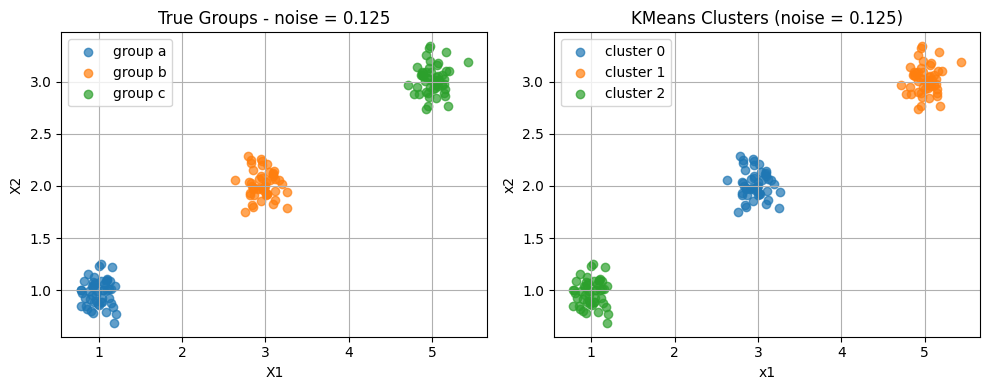

Attempting to plot: noise = 0.25


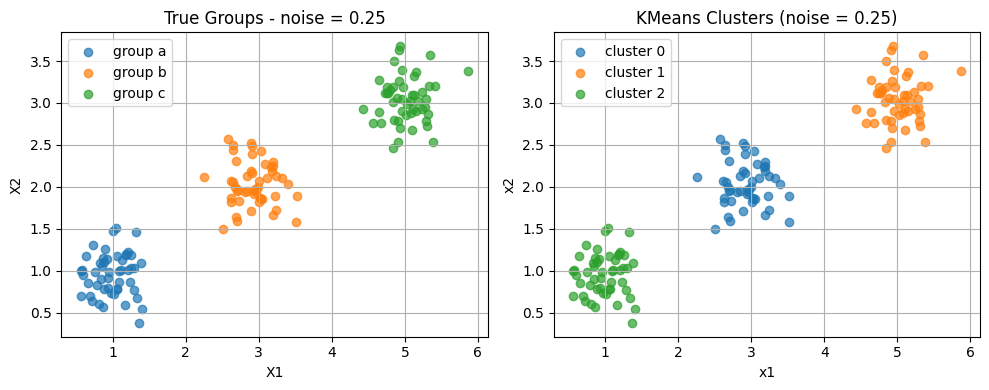

Attempting to plot: noise = 0.5


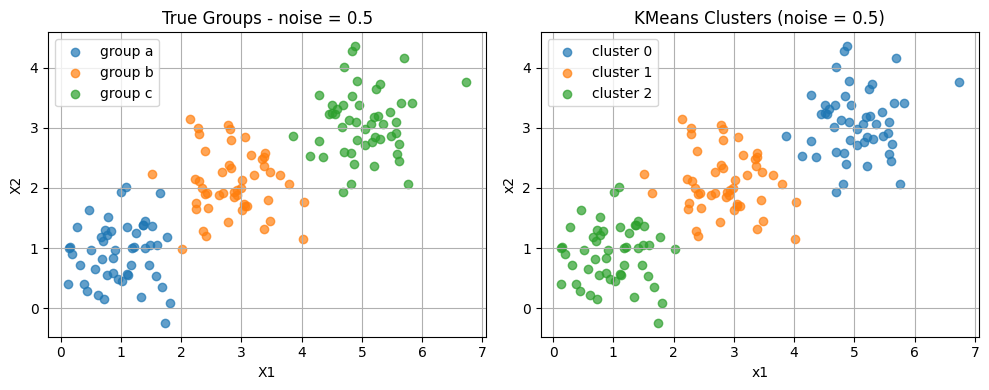

Attempting to plot: noise = 1.0


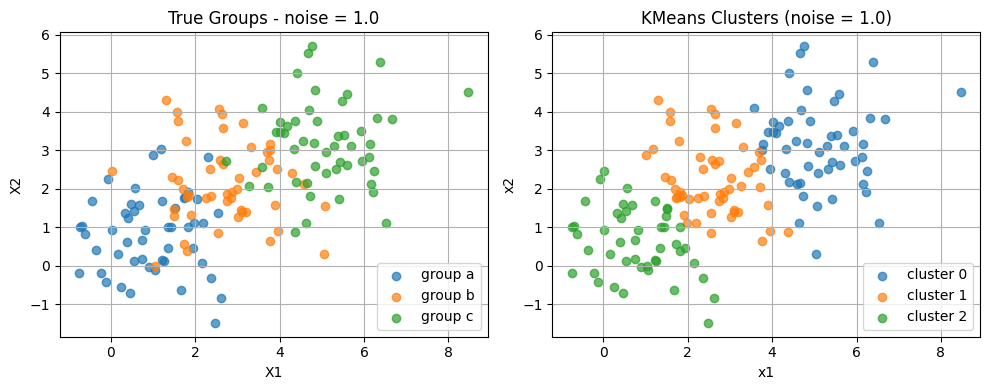

Attempting to plot: noise = 2.0


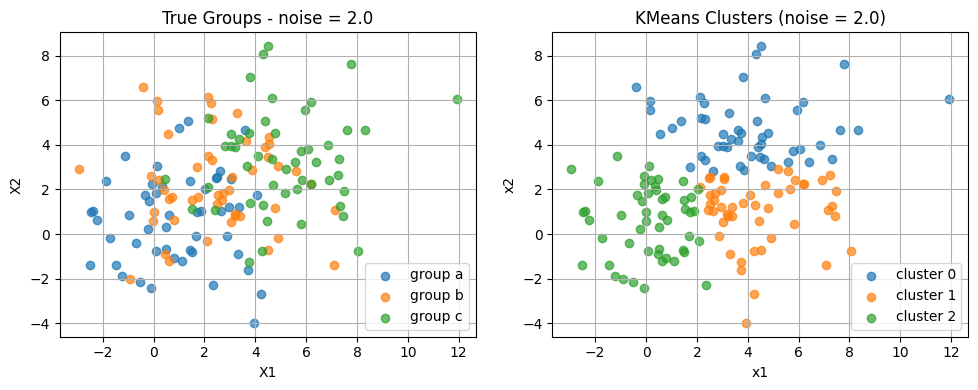

In [ ]:
def plot_true_vs_kmeans(df, noise_label):
  fig, axes = plt.subplots(1, 2, figsize=(10, 4))

  # True groups
  for g in sorted(df['group'].unique()):
    sub = df[df['group'] == g]
    axes[0].scatter(sub['x1'], sub['x2'], label=f'group {g}', alpha=0.7)
  axes[0].set_xlabel('X1')
  axes[0].set_ylabel('X2')
  axes[0].set_title(f'True Groups - {noise_label}')
  axes[0].legend()
  axes[0].grid(True)

  # Kmeans clusters
  for c in sorted(df['cluster'].unique()):
    sub = df[df['cluster'] == c]
    axes[1].scatter(sub['x1'], sub['x2'], label=f'cluster {c}', alpha=0.7)
  axes[1].set_title(f"KMeans Clusters ({noise_label})")
  axes[1].set_xlabel("x1")
  axes[1].set_ylabel("x2")
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()
  plt.show()
  plt.close(fig) # Close the figure after showing

# Run visual for all datasets
for name, data in datasets.items():
  print(f"Attempting to plot: {name}") # Added print statement
  clustered_df, _ = run_kmeans(data.copy(), k = 3)
  plot_true_vs_kmeans(clustered_df, name)

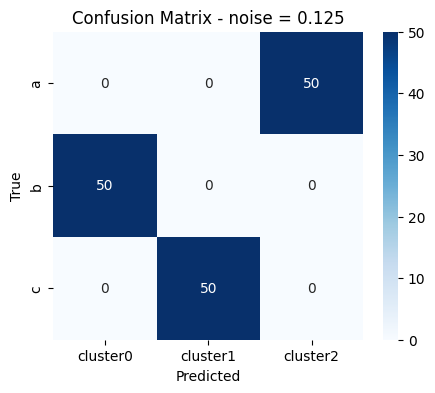

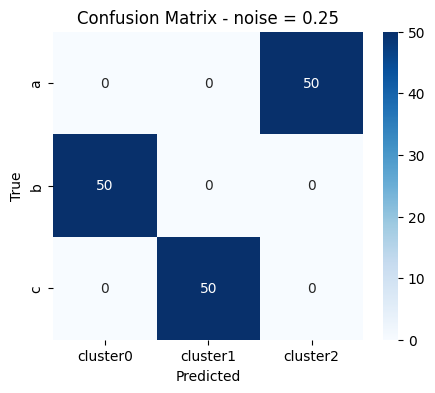

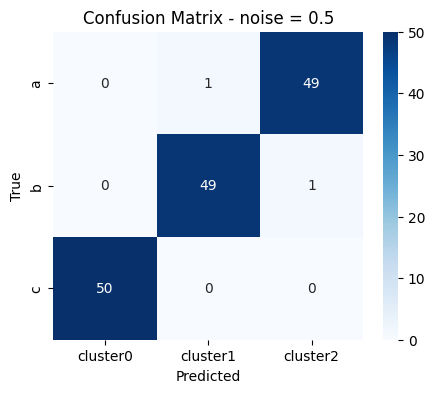

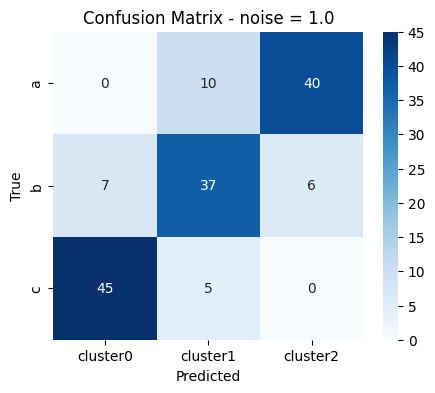

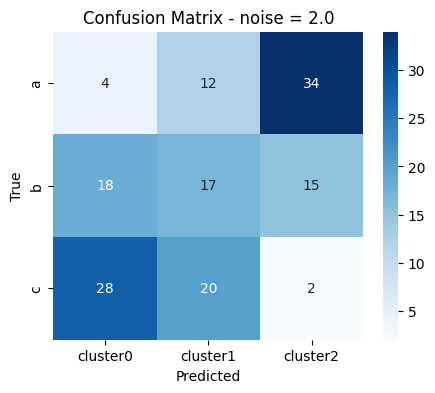

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion(df, noise_label):
  # Convert group to numerical labels
  df['group_numeric'] = df['group'].astype('category').cat.codes
  cm = confusion_matrix(df['group_numeric'], df['cluster'])
  plt.figure(figsize=(5,4))

  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f"cluster{i}" for i in sorted(df['cluster'].unique())], yticklabels = sorted(df['group'].unique()))
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(f'Confusion Matrix - {noise_label}')
  plt.show()

# Generate for each dataset
for name, data in datasets.items():
  clustered_df, _ = run_kmeans(data.copy(), k = 3) # Unpack the tuple here
  plot_confusion(clustered_df, name)

In [ ]:
def scree_plot(df, noise_label, max_k=6):
  X = df[['x1', 'x2']].values
  sse = []

  K = range(1, 7)
  for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init= 10)
    km.fit(X)
    sse.append(km.inertia_)

  plt.figure(figsize=(6, 4))
  plt.plot(K, sse, marker = 'o')
  plt.xlabel('k')
  plt.ylabel('SSE (intertia)')
  plt.title(f'Scree Plot - {noise_label}')
  plt.grid(True)
  plt.show()

  # Generate scree plots for each dataset
  for name, data in datasets.items():
    scree_plot(data.copy(), name)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def scree_plot(df, noise_label, max_k=6):
  X = df[['x1', 'x2']].values
  sse = []

  K = range(1, 7)
  for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init= 10)
    km.fit(X)
    sse.append(km.inertia_)

  plt.figure(figsize=(6, 4))
  plt.plot(K, sse, marker = 'o')
  plt.xlabel('k')
  plt.ylabel('SSE (inertia)')
  plt.title(f'Scree Plot - {noise_label}')
  plt.grid(True)
  plt.show()

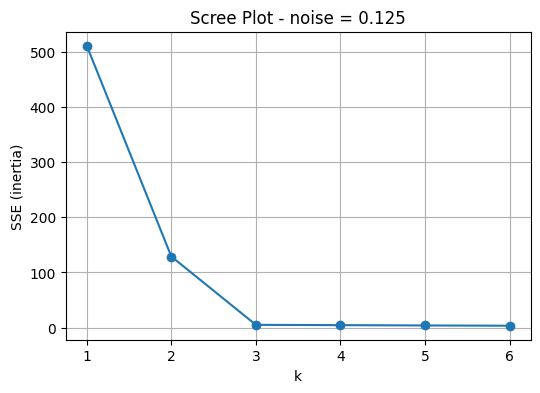

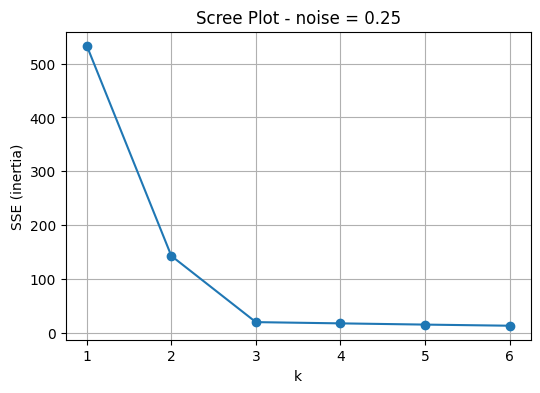

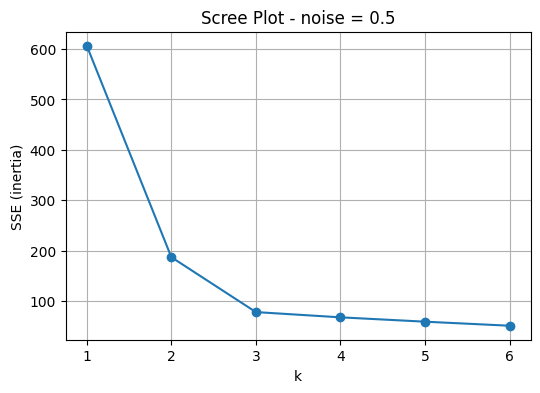

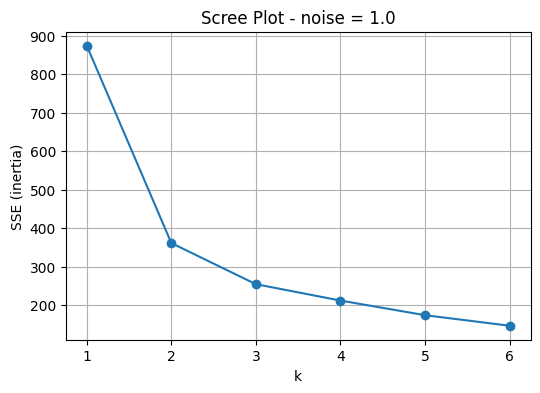

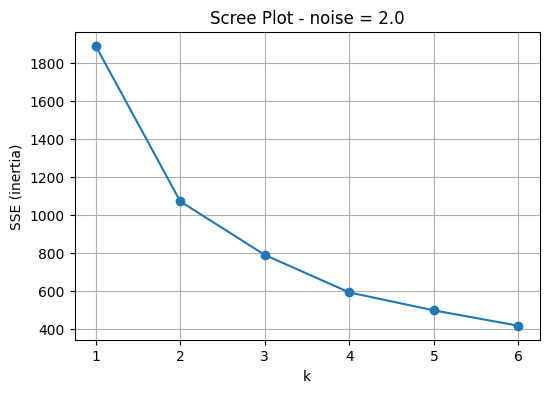

In [ ]:
# Generate scree plots for each dataset
for name, data in datasets.items():
  scree_plot(data.copy(), name)

The elbow method identifies the point where adding more clusters yields diminishing returns in reducing SSE. In these simulations, the elbow appears clearly at k = 3 when the noise is low (0.125, 0.25), becomes less distinct as noise increases (0.5, 1.0) and nearly disappears at hight noise (2.0), showing that greater overlap between the clusters makes selecting k more ambigious.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [ ]:
import pandas as pd
from scipy.stats import fisher_exact

election = pd.read_csv('2022 election cycle fundraising.csv')

# Clean numeric columns
for col in ['Raised', 'Spent', 'Cash on Hand', 'Debts']:
    election[col] = election[col].str.replace('$', '').str.replace(',', '').astype(float)

# Define binary outcome
median_raised = election["Raised"].median()
election["HighFundraising"] = (election["Raised"] > median_raised).astype(int)

election.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,HighFundraising
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0,1
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0,1
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,1
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0,0


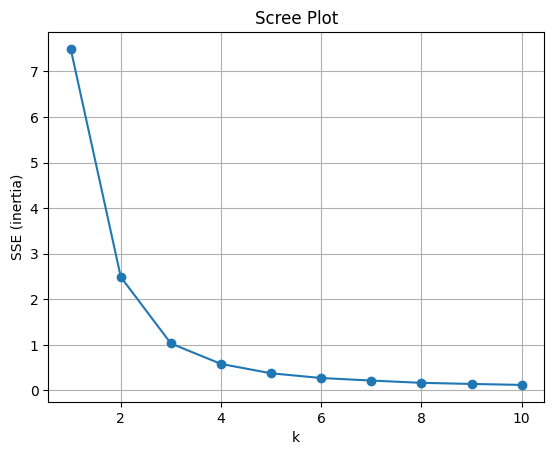

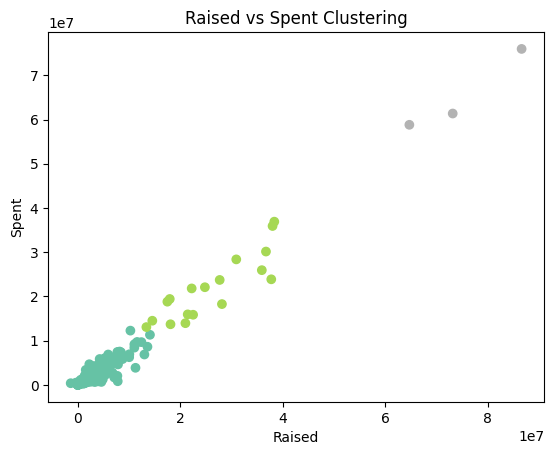

Politicians in the smallest two clusters:
                     Member       Party      Raised       Spent  \
2               Adam Schiff  Democratic  20993041.0  13957854.0   
87   Catherine Cortez Masto  Democratic  37993811.0  35928936.0   
89            Chuck Schumer  Democratic  35899966.0  25944350.0   
115            Dan Crenshaw  Republican  14535870.0  14512435.0   
261            John Kennedy  Republican  28119082.0  18276565.0   
290            Katie Porter  Democratic  21441693.0  15946876.0   
298          Kevin McCarthy  Republican  24791538.0  22086344.0   
326           Maggie Hassan  Democratic  30914830.0  28380992.0   
328             Marco Rubio  Republican  36709285.0  30153111.0   
340              Mark Kelly  Democratic  73140886.0  61357281.0   
357          Michael Bennet  Democratic  18086343.0  13713611.0   
390            Nancy Pelosi  Democratic  22216583.0  21814643.0   
402            Patty Murray  Democratic  13377243.0  13073248.0   
414               Ra

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = election[["Raised", "Spent"]].dropna()


# normalize
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# scree plot
sse = []
K = range(1, 11)

for k in K:
  km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_norm)
  sse.append(km.inertia_)

plt.plot(K, sse, marker='o')
plt.xlabel('k')
plt.ylabel('SSE (inertia)')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# FIt otimal k
k = 3
km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_norm)
election["Cluster_RSpend"] = km.labels_

# Scatter
plt.scatter(X["Raised"], X["Spent"], c=election["Cluster_RSpend"], cmap = "Set2")
plt.xlabel("Raised")
plt.ylabel("Spent")
plt.title("Raised vs Spent Clustering")
plt.show()

# Smallest two clusters
small_clusters = (
    election.groupby("Cluster_RSpend")
    .size()
    .sort_values()
    .head(2)
    .index
)

print("Politicians in the smallest two clusters:")
print(election[election["Cluster_RSpend"].isin(small_clusters)][["Member", "Party", "Raised", "Spent", "Cluster_RSpend"]])

In [ ]:
X2 = election[["Cash on Hand", "Debts"]].dropna()

from sklearn.preprocessing import MinMaxScaler


# normalize
scaler = MinMaxScaler()
X2_norm = scaler.fit_transform(X2)

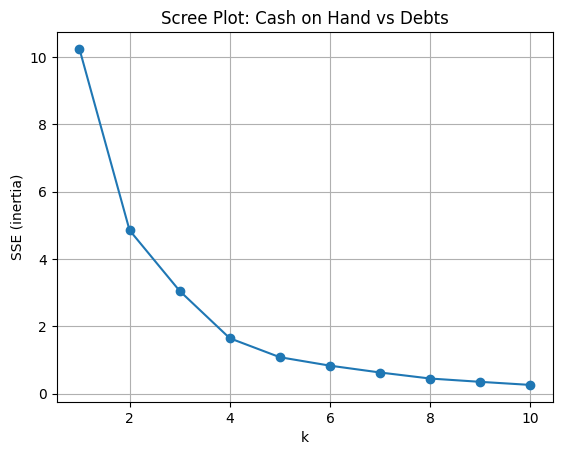

In [ ]:
sse = []
K = range(1, 11)

for k in K:
  km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X2_norm)
  sse.append(km.inertia_)

plt.plot(K, sse, marker='o')
plt.xlabel('k')
plt.ylabel('SSE (inertia)')
plt.title('Scree Plot: Cash on Hand vs Debts')
plt.grid(True)
plt.show()

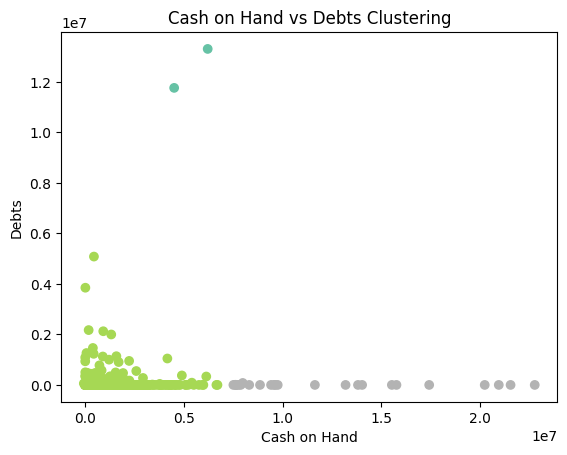

In [ ]:
# pick k

k_opt2 = 3
kmeans2 = KMeans(n_clusters=k_opt2, random_state=42, n_init=10).fit(X2_norm)
election["Cluster_CashDebts"] = kmeans2.labels_

# plot

plt.scatter(X2["Cash on Hand"], X2["Debts"], c=election["Cluster_CashDebts"], cmap = "Set2")
plt.xlabel("Cash on Hand")
plt.ylabel("Debts")
plt.title("Cash on Hand vs Debts Clustering")
plt.show()

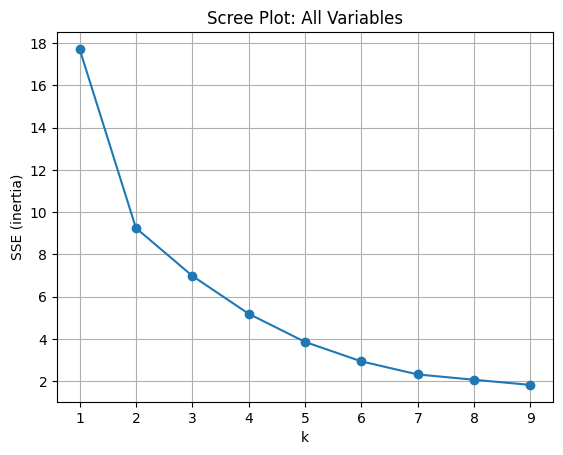

In [ ]:
x_all = election[["Raised", "Spent", "Cash on Hand", "Debts"]].dropna()


scaler = MinMaxScaler()
x_all_norm = scaler.fit_transform(x_all)

sse = []
K = range(1,10)

for k in K:
  km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(x_all_norm)
  sse.append(km.inertia_)

plt.plot(K, sse, marker='o')
plt.xlabel('k')
plt.ylabel('SSE (inertia)')
plt.title('Scree Plot: All Variables')
plt.grid(True)
plt.show()

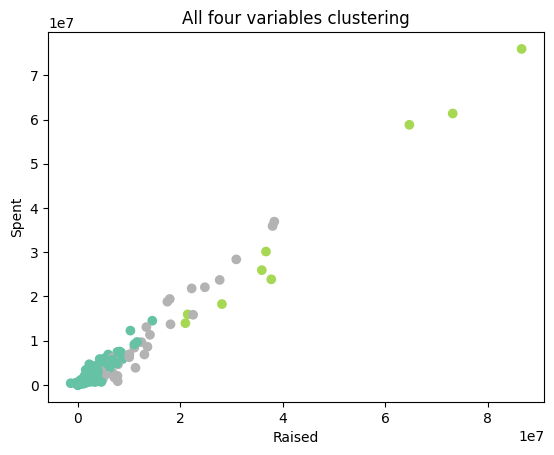

In [ ]:
k_opt_all = 3
kmeans_all = KMeans(n_clusters=k_opt_all, random_state=42, n_init=10).fit(x_all_norm)
election["Cluster_All"] = kmeans_all.labels_

# plot
plt.scatter(x_all["Raised"], x_all["Spent"], c=election["Cluster_All"], cmap = "Set2")
plt.xlabel("Raised")
plt.ylabel("Spent")
plt.title("All four variables clustering")
plt.show()

KMeans consistently produced three clusters, with one large group and mall clusters of extreme fundraisers. Results were similar across Raised/Spent, CashOnHand/Debts, and all four variables, showing KMeans mainly identifies outliers rather than deeper structure among most candidates.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?